## Linear Regression

[939.03128722   0.        ]
150.88064774434977


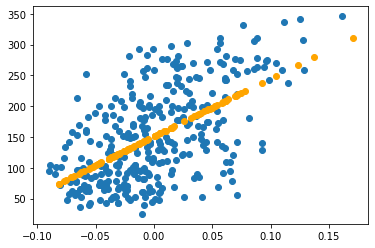

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
X,y=load_diabetes(return_X_y=True)
## appending 1 for change of notation
X=np.c_[np.ones(( X.shape[0], 1)), X]
X=X[:,[3,0]]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=132)
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred=model.predict(X_test)
print(model.coef_)
print(model.intercept_)
plt.scatter(X_train[:,[0]],y_train)
plt.scatter(X_test[:,[0]],y_pred,color="orange")

## Using normal equation

#### Normal Equation

[939.03128722 150.88064774]


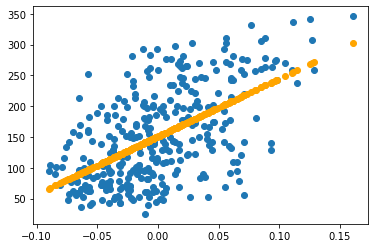

In [3]:
def normal_equation(X,y):    
    a=np.dot(X.T,X)
    b=np.dot(X.T,y)
    a_inv=np.linalg.pinv(a)
    w=np.dot(a_inv,b)
    return w
w=normal_equation(X_train,y_train)
print(w)
def predict(X,w):
    return np.dot(w,X.T)
y_predict=predict(X_train,w)
plt.scatter(X_train[:,[0]],y_train)
plt.scatter(X_train[:,[0]],y_predict,color="orange")

### Gradient descent

[939.01355772 150.88064955]


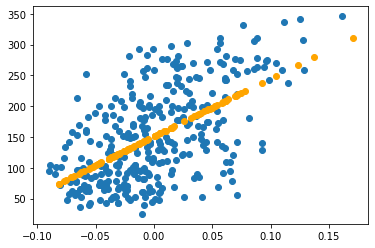

In [6]:
def gradient_descent(X,y):
    alpha=0.005
    m=X.shape[1]
    theta=np.zeros(m)
    for i in range(3000):
        pred=X@theta.T
        delta=pred-y
        theta=theta-alpha*(X.T@delta)
    return theta
theta=gradient_descent(X_train,y_train)
def predict(X,w):
    return np.dot(X,w)
y_predict1=predict(X_test,theta)
print(theta)
plt.scatter(X_train[:,[0]],y_train)
plt.scatter(X_test[:,[0]],y_predict1,color="orange")


# KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
X=X[:,[3]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1392)

knn=KNeighborsClassifier(3)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1392)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
[1 if i>1 else 0 for i in range(10)]
tr=[1 if pred[i]==y_test[i] else 0 for i in range(len(pred))]
print(sum(tr)/len(pred))


0.8811188811188811


In [80]:
def euclidean_distance(a,b):
    return np.linalg.norm(a-b)
class KNN:
    def __init__(self,X,y,k):
        self.X_train=X
        self.k=k
        self.y=y
    def euclidean_distance(self,a,b):
        return np.linalg.norm(a-b)
    def predict(self,x):
        dist=[self.euclidean_distance(self.X_train[i],x) for i in range(len(self.X_train))]
        indices=np.argsort(dist)
        knn=[y[i] for i in indices]
        knn=knn[:self.k]
        val=sum([label for label in knn])
        return 1 if val>self.k/2 else 0
    def score(self,X_test,y_test):
        labels=[self.predict(X_test[i]) for i in range(len(X_test))]
        validate=sum([1 if labels[i]==y_test[i] else 0 for i in range(len(labels))])
        return validate/len(y_test)
    
knn=KNN(X_train,y_train,5)
knn.score(X_test,y_test)


0.46153846153846156

### Logistic regression

In [141]:

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)
sc=clf.score(X_test,y_test)
print(clf.coef_)
print(clf.intercept_)
print(sc)

[[ 0.00244421  0.84190347  0.19684111 -0.27017967  0.01972026 -0.15738405
  -0.21131795 -0.48703226 -0.27558077 -0.23921825 -0.03164833 -0.07042608
   0.91976378 -0.12645606 -0.08582211 -0.02338375  0.05997622 -0.01950624
  -0.03527346 -0.04655113  0.01332798  0.29694163 -0.40991336 -0.05051485
  -0.01575016 -0.33036146 -0.74887756 -1.34792854 -0.60487041 -0.71193808
  -0.10103251]]
[24.41138775]
0.965034965034965


In [146]:
X,y=load_breast_cancer(return_X_y=True)
X=np.c_[np.ones(( X.shape[0], 1)), X]
#X=X[:,[0,3]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1392)

def gradient_ascent(X,y):
    alpha=0.05
    m=X.shape[1]
    theta=np.zeros(m)
    print(m)
    for i in range(4500):
        pred=predict(X@theta.T)
        delta=y-pred
        theta=theta+(alpha)*(X.T@delta)
    return theta
def predict(h_x):
    sigmoid= 1/(1+np.exp(-h_x))
    pred=[1 if sigmoid[i]>0.5 else 0 for i in range(len(sigmoid))]
    return pred
w=gradient_ascent(X_train,y_train)

def score(X,y,theta):
    pred=predict(X@theta.T)
    validate=[1 if pred[i]==y[i] else 0 for i in range(len(pred))]
    return sum(validate)/len(pred)
sc=score(X_test,y_test,w)
print(sc)

31


<ipython-input-146-bbc5450e3c52>:17: RuntimeWarning: overflow encountered in exp
  sigmoid= 1/(1+np.exp(-h_x))


0.9440559440559441


### Support Vector Machine

In [45]:
#Support vector classification
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12032)

from sklearn import svm
#linear svm
#loss{‘hinge’, ‘squared_hinge’}, default=’squared_hinge’
svc=svm.LinearSVC(loss='hinge')
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print("Linear SVC score {0}".format(score))
#ordinary svc with linear kernal 
#Different score?
#because based on different c libraries
svc=svm.SVC(kernel="linear")
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print("ordinary svc with Linear kernel score {0}".format(score))
#non linear kernel
#default gaussian kernel kernel="rbf"
svc=svm.SVC()
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print("ordinary svc score with gaussian kernel {0}".format(score))

svc=svm.SVC(kernel="sigmoid")
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print("ordinary svc score with sigmoid kernel {0}".format(score))

svc=svm.SVC(kernel="poly",degree=8)
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print("ordinary svc score with polynomial kernel with degree 8 {0}".format(score))


E:\Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC score 0.8881118881118881
ordinary svc with Linear kernel score 0.965034965034965
ordinary svc score with gaussian kernel 0.916083916083916
ordinary svc score with sigmoid kernel 0.46853146853146854
ordinary svc score with polynomial kernel with degree 8 0.9090909090909091


### Generative models

In [15]:
# naive bayes
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12032)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
score=gnb.score(X_test,y_test)
print("Score {0}".format(score))
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
score=mnb.score(X_test,y_test)
print("score for multinomial {0}".format(score))

#discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
score=lda.score(X_test,y_test)
print("Score for linear discriminant analysis {0}".format(score))

Score 0.9300699300699301
score for multinomial 0.9020979020979021


0.9440559440559441